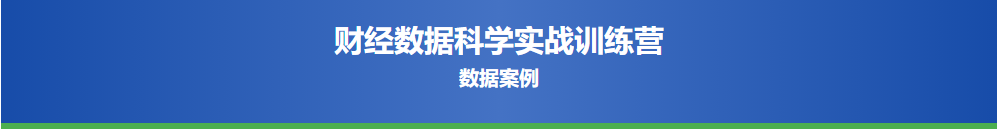

# 写在前面：
主要涉及到的库：pandas、pyecharts（0.5.11）、xlrd。所使用的数据为2020.1.19-2020.4.27国内34个省市新冠疫情的面板数据。
指定版本的pyecharts的安装可采用pip install pyecharts==0.5.11来实现、

## 案例基本信息


**案例名称**

新冠肺炎疫情数据可视化分析

**关键词**

pyecharts数据可视化

**作者姓名**

付业涛

**单位**

中南财经政法大学会计学院


**摘要**

<p>本案例应用Python的Pyecharts库通过数据可视化，展现中国各省的疫情分布情况。</p>
<p>案例主要包含以下内容：绘制疫情分布柱状图、折线图、组合式统计图、疫情地图等，展现中国各省市新冠肺炎确诊人数的分布情况；</p>

**背景**

<p>2020年初，新冠病毒肆虐，疫情发展情况不由牵动着每个人的心。作为一名会计学专业的学生，除了在学习好本专业知识的同时也希望通过学习一些新的知识和技能开拓自己的眼界，提高自己的动手能力。通过参加第一届数据科学训练营学习到了很多关于时下热门的Python编程语言的知识，并且在训练营知识的基础上结合网络上的一些学习资源使我对Python可视化图表的绘制产生了浓厚的兴趣。因此就想结合当时的热点事件——新冠肺炎疫情来提高自己对于Python可视化图表的掌握程度。</p>


**数据说明**

<p>本案例所使用的数据均来源于疫情期间各省市卫健委公布数据。</p>
<p>本案例所使用的数据主要为2020年2月19日-2020年4月27日为期100天的各省累计确诊、治愈及死亡病例的面板数据</p>

# 案例正文
## 1.数据的导入及处理

In [6]:
import pandas as pd
import pyecharts as pe
import warnings

In [36]:
warnings.filterwarnings('ignore')
pan = pd.read_excel('100day_panel.xlsx', index_col='日期')
pan.head(10)

,省市,确诊,死亡,治愈
日期,,,,
2020-01-19,湖北,198,4,25
2020-01-19,河南,1,0,0
2020-01-19,湖南,0,0,0
2020-01-19,重庆,0,0,0
2020-01-19,江西,0,0,0
2020-01-19,安徽,0,0,0
2020-01-19,江苏,0,0,0
2020-01-19,山东,0,0,0
2020-01-19,广东,1,0,0


In [3]:
pan.info() # 查看数据文件的信息

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3400 entries, 2020-01-19 to 2020-04-27
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   省市      3400 non-null   object
 1   确诊      3400 non-null   int64 
 2   死亡      3400 non-null   int64 
 3   治愈      3400 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 132.8+ KB


In [37]:
pan['现存'] = pan['确诊'] - pan['死亡'] - pan['治愈'] # 计算每日现存病例数
data_china = pan.groupby('日期')[['确诊', '死亡', '治愈', '现存']].sum()  # 得到全国的时间序列数据
data_hb = pan[pan['省市'] == '湖北']  # 由于湖北省的数据和其他省的数据放在一起分析不合适，所以单独创建一个
data_nohb = pan[pan['省市'] != '湖北'].groupby('日期')[['确诊', '死亡', '治愈', '现存']].sum()  # 非湖北省的数据合计

In [38]:
data_china['确诊新增'] = data_china['确诊'] - data_china['确诊'].shift()
data_china['死亡新增'] = data_china['死亡'] - data_china['死亡'].shift()
data_china['治愈新增'] = data_china['治愈'] - data_china['治愈'].shift()

data_china['确诊增长率'] = data_china['确诊新增'] / data_china['确诊'].shift()
data_china['确诊增长率'] = data_china['确诊增长率'].round(2)

data_china['治愈率'] = data_china['治愈'] / data_china['确诊'].shift()
data_china['治愈率'] = data_china['治愈率'].round(2)
data_china['治愈率'].tail(20)

日期
2020-04-08    0.93
2020-04-09    0.94
2020-04-10    0.94
2020-04-11    0.94
2020-04-12    0.94
2020-04-13    0.94
2020-04-14    0.94
2020-04-15    0.94
2020-04-16    0.93
2020-04-17    0.92
2020-04-18    0.92
2020-04-19    0.93
2020-04-20    0.93
2020-04-21    0.93
2020-04-22    0.93
2020-04-23    0.93
2020-04-24    0.93
2020-04-25    0.93
2020-04-26    0.93
2020-04-27    0.93
Name: 治愈率, dtype: float64

In [39]:
data_hb['确诊新增'] = data_hb['确诊'] - data_hb['确诊'].shift()
data_hb['死亡新增'] = data_hb['死亡'] - data_hb['死亡'].shift()
data_hb['治愈新增'] = data_hb['治愈'] - data_hb['治愈'].shift()
data_hb['现存新增'] = data_hb['现存'] - data_hb['现存'].shift()

data_nohb['确诊新增'] = data_nohb['确诊'] - data_nohb['确诊'].shift()
data_nohb['死亡新增'] = data_nohb['死亡'] - data_nohb['死亡'].shift()
data_nohb['治愈新增'] = data_nohb['治愈'] - data_nohb['治愈'].shift()
data_nohb['现存新增'] = data_nohb['现存'] - data_nohb['现存'].shift()

# 2. 常用图表绘制

## 2.1 简单柱状图

In [40]:
bar1 = pe.Bar('全国累计确诊柱状图', title_pos='left')  # 定义一个图表对象并设置图表标题及其位置（左中右或百分比）
x = data_china.index.astype('str') # 将日期数据转换为文本型
y = data_china['确诊']

bar1.add('确诊', x, y, is_datazoom_show=True, datazoom_type='both', 
         is_datazoom_extra_show=True, tooltip_trigger='axis', tooltip_axispointer_type='cross')
bar1

第一个参数为图例名称；           
is_datazoom_show可以实现图表缩放功能，选项有True和False（默认）；is_datazoom_extra_show可以实现Y轴的缩放；          
datazoom_type设置图表缩放的方式，选项有“inside”、“outside”和“both”，inside是使用鼠标滚轮，outside是通过图标下方滑动条；       
tooltip_trigger用来触发交互式标签，有“axis”和“item”两个选项，在柱状图和折线图这种有坐标轴的使用前者，饼状图等使用后者；        
tooltip_axispointer_type设置交互样式，有“line”、“shadow”和“cross”几种选项。

## 2.2 数据堆叠以及坐标轴转换

In [41]:
bar2 = pe.Bar('全国治愈与死亡数据', title_pos='right')
x = data_china.index.astype('str')
y1 = data_china['治愈']
y2 = data_china['死亡']

bar2.add('治愈', x, y1, is_stack=True)
bar2.add('死亡', x, y2, is_stack=True)
bar2

In [42]:
bar3 = pe.Bar('湖北省现存病例数量变化')
x = data_hb.index.astype('str')
y = data_hb['现存']

bar3.add('现存', x, y, is_convert=True)
bar3

为什么转换过之后Y轴只显示序号而非字符串值，这问题有待解决

## 2.3 分组柱状图

In [43]:
bar4 = pe.Bar('非湖北治愈与现存')
x = data_nohb.index.astype('str')
y1 = data_nohb['治愈']
y2 = data_nohb['现存']

bar4.add('治愈', x, y1)
bar4.add('现存', x, y2, is_datazoom_show=True)
bar4

## 2.4 简单折线图

In [44]:
line1 = pe.Line('全国确诊增长率与治愈率')
x = data_china.iloc[1::].index.astype('str')
y1 = data_china['确诊增长率'].iloc[1::] # 因为增长率在数据里第一行是缺失的，所以从第二行开始引用
y2 = data_china['治愈率'].iloc[1::]

line1.add('确诊增长率', x, y1)
line1.add('治愈率', x, y2, is_datazoom_show=True, is_smooth=True)
line1

is_smooth用于设置曲线是否平滑。和分组柱状图一样，折线图也可以同时添加两条及以上的折线，并且可以单独设置每条折线是否平滑。另外由于我们的比率数据第一行有缺失，因此使用 iloc[1::] 限定一下数据范围

## 2.5 折线图与柱状图合并

In [45]:
x = data_china.iloc[1::].index.astype('str')
y1 = data_china['现存'].iloc[1::]
y2 = data_china['治愈率'].iloc[1::]

bar5 = pe.Bar('全国现存病例数与治愈率')
bar5.add('现存病例数', x, y1, is_datazoom_show=True)

line2 = pe.Line('')
line2.add('治愈率', x, y2)

overlap = pe.Overlap()
overlap.add(bar5)
overlap.add(line2, is_add_yaxis=True, yaxis_index=1)
overlap

需要为折线图单独增加一条Y轴

## 2.6 气泡图

In [46]:
# 先定义一个函数，用于提取特定日期特定省份的数据
pane = pd.read_excel('100day_panel.xlsx')
pane['现存'] = pane['确诊'] - pane['死亡'] - pane['治愈']  # 似乎用上面定义过索引的数据是不行的，重新定义一个

def data_region_time(region, time):
    datai = pane[pane['省市'] == region]
    datai['确诊新增'] = datai['确诊'] - datai['确诊'].shift()
    datai['死亡新增'] = datai['死亡'] - datai['死亡'].shift()
    datai['治愈新增'] = datai['治愈'] - datai['治愈'].shift()
    datai['现存新增'] = datai['现存'] - datai['现存'].shift()
    return datai[datai['日期'] == time]

data_guangdong = data_region_time('广东', '2020-02-01')
data_shanghai = data_region_time('上海', '2020-02-01')
data_beijing = data_region_time('北京', '2020-02-01')

scatter1 = pe.EffectScatter('2020.2.1疫情形势', width=1000)
scatter1.add('广东', [data_guangdong['确诊新增']], [data_guangdong['治愈新增']], symbol_size=data_guangdong['现存'].iloc[0]/20)
scatter1.add('上海', [data_shanghai['确诊新增']], [data_shanghai['治愈新增']], symbol_size=data_shanghai['现存'].iloc[0]/20)
scatter1.add('北京', [data_beijing['确诊新增']], [data_beijing['治愈新增']], symbol_size=data_beijing['现存'].iloc[0]/20,
            xaxis_name='确诊新增', yaxis_name='治愈新增', xaxis_name_pos='end', yaxis_name_gap=50, legend_pos='50%')
scatter1

带涟漪特效的散点图可以提供三个维度的信息，所以在参数里可以看到。为了防止点过大，需要将symbol_size需要除以30。        
xaxis_name_pos设置X轴名称的位置；           
yaxis_name_gap设置Y轴名称和Y轴的距离；            
legend_pos设置图例的位置，百分比表示距离图表左边的距离

# 3. 动态图表

时间轴是形成动态图表的关键工具，原理是通过建立一个循环，将不同时点的数据加入图表，从而形成动态的效果，所以前后的图表类型需要一致。有点像动画的原理，是由不同的画面叠加在一起并顺序播放形成的。

## 3.1 时间轴与折线图

由于柱状图和条形图运用时间轴进行不同时点的叠加意义不大，只是取代了手工拉滑动条的动作，所以这里只用折线图做个演示。

In [47]:
data_hu = pane[pane['省市'] == '湖北']  # 保险起见，不用前面人为指定过索引的数据
data_hu = data_hu.reset_index(drop=True)  # 筛选数据后，索引乱了，所以需要重置一下，以免影响后面的调用
# 先定义一个绘图函数
def fig(days):
    line3 = pe.Line('湖北现存病例100天变化走势')
    x = data_hu['日期'].head(days).astype('str')
    y = data_hu['现存'].head(days).tolist()
    assert len(x) == len(y)
    line3.add('现存病例数', x, y, is_smooth=True, mark_line=['max'])
    return line3

datelist = data_hu['日期'].astype('str').tolist()
timeline = pe.Timeline(is_auto_play=False, timeline_play_interval=50, timeline_bottom='-5%')
day = 0

for i in datelist:
    day = day + 1
    timeline.add(fig(day), i)
timeline

由于折线图和下面的散点图不一样，散点图只需要将不同时间点的图不断覆盖即可，但折线图需要有一个连贯的过程，所以难点在于日期的处理上，需要是一个逐渐递增的时间区间，因此先定义一个根据特定天数来获取一定期间的数据并绘制折线图的函数fig()。再用一个循环使timeline做到动态折线图的效果。timeline_play_interval设置时间轴不同时间点切换的时间间隔，单位：毫秒；timeline_bottom设置时间轴控制条距离图表底部的距离。

## 3.2 时间轴与气泡图

In [48]:
regions = ['浙江', '广东', '湖南', '上海', '重庆', '四川', '河南', '江苏']

def regiondata_time(where, time):
    data = pane[pane['省市'] == where]
    data['确诊新增'] = data['确诊'] - data['确诊'].shift()
    data['死亡新增'] = data['死亡'] - data['死亡'].shift()
    data['治愈新增'] = data['治愈'] - data['治愈'].shift()
    data['现存新增'] = data['现存'] - data['现存'].shift()
    return data[data['日期'] == time]

def fig3(regionlist, time):
    scatter3 = pe.EffectScatter('%s 疫情情况' % time, width=1000)
    for i1 in regionlist:
        data3 = regiondata_time(i1, time)
        scatter3.add(i1, [data3['确诊新增']], [data3['现存新增']], symbol_size=data3['确诊'].iloc[0] / 30,
                     xaxis_name='确诊病例新增', xaxis_name_pos='middle',
                     yaxis_name='现存病例新增', yaxis_name_gap=40,
                     is_toolbox_show=True,
                     tooltip_axispointer_type='cross',
                     legend_pos='50%')
    return scatter3

# 进一步，我们添加时间轴
datelist = pane[pane['省市'] == '湖北']['日期'].head(30).astype('str').tolist()
timeline2 = pe.Timeline(is_auto_play=False, timeline_play_interval=2000,
                       timeline_bottom='-5%', width=1000)
for i in datelist:
    timeline2.add(fig3(regions, i), i)
timeline2

# 4. 疫情地图

要用pyecharts绘制数据地图，需要先pip安装地图数据。            
全球国家地图: echarts-countries-pypkg (1.9MB): 世界地图和 213 个国家，包括中国地图              
中国省级地图: echarts-china-provinces-pypkg (730KB)：23 个省，5 个自治区             
中国市级地图: echarts-china-cities-pypkg (3.8MB)：370 个中国城市             
中国县区级地图: echarts-china-counties-pypkg (4.1MB)：2882 个中国县·区           
中国区域地图: echarts-china-misc-pypkg (148KB)：11 个中国区域地图，比如华南、华北。  
上面的地图包需要安装过以后重启一下notebook才能够正常显示图像哦。

## 4.1带时间轴的普通疫情地图

In [19]:
pane = pd.read_excel('100day_panel.xlsx')
pane['现存'] = pane['确诊'] - pane['死亡'] - pane['治愈']

def drmap(date):
    data = pane[pane['日期'] == date]
    sheng = data['省市']
    xiancun = data['现存']
    map = pe.Map('%s 全国现存病例分布' % date, width=2000, height=2000, title_text_size=40)
    map.add('', sheng, xiancun, maptype='china', is_roam=True, is_label_show=True, is_visualmap=True, is_piecewise=True,
            visual_text_color='#000', visual_range_text=['', ''], center=['40%', '60%'],
            pieces=[{'max': 100000, 'min': 10000, 'label': '>10000', 'color': '#FF3030'},
                    {'max': 9999, 'min': 1000, 'label': '1000-10000', 'color': '#FF7F50'},
                    {'max': 999, 'min': 500, 'label': '500-999', 'color': '#FFB90F'},
                    {'max': 499, 'min': 100, 'label': '100-499', 'color': '#FFDEAD'},
                    {'max': 99, 'min': 10, 'label': '10-99', 'color': '#FFEFD5'},
                    {'max': 9, 'min': 1, 'label': '1-9', 'color': '#FFFAFA'},
                    {'max': 0, 'min': 0, 'label': '0', 'color': '#FFFFFF'}])
    return map


datelist = pane[pane['省市'] == '湖北']['日期'].head(100).astype('str').tolist()
timeline3 = pe.Timeline(is_auto_play=False, timeline_play_interval=200,
                       timeline_bottom='-2%', timeline_left='10%', width=1000, height=800)
for i in datelist:
    timeline3.add(drmap(i), i)
timeline3

这部分的代码看起来可能有点复杂。首先，由于要使用时间轴，另外地图也是可以不同时点叠加，因此我们只需要定义一个绘制指定时点的疫情地图即可。
可以看到地图的两个参数，一个是省市一个是对应数据；      
is_roam是设置地图在图像里是否可移动及缩放的选项；     
is_label_show设置地图上的省市名称是否显示；     
is_visualmap设置了之后才可以起到根据不同数据量级显示不同颜色的功能；  
is_piecewise设置了之后，才能进一步根据自己的需要，对数据量级进行分组以及设置颜色等；  
pieces里面的参数分别是：每组上限、每组下限、标签显示的文字、颜色（十六进制颜色的代码，可以自行百度，该部分完全自创哈哈哈）；  
timeline_bottom设置时间轴组件距离图像底端的距离，同理timeline_left设置距离图像左端的距离。当然时间轴自己的长宽也可设置。


## 4.2 地理坐标系线图

In [21]:
style = pe.Style(title_pos='center',  # 标题位置
             width=1200,
             height=600,
             background_color='#FFFFFF',)
# 以上是通用样式设置

geo_style = style.add(is_label_show=False,  # 数值是否显示
                     line_curve=0.2,  # 曲线弧度
                     line_opacity=0.6,  # 曲线透明度
                     legend_color='#eee',  # 图例的颜色？但是好像会被下面的设置覆盖掉
                     legend_pos='left',  # 图例的位置
                     geo_effect_symbol='plane',  # 移动点的形状，默认圆点
                     geo_effect_symbolsize=15,  # 这个不用说了
                     label_color=['#a6c84c', '#ffa022', '#46bee9'],  # 三组数据及图例的颜色好像
                     label_pos='right',  # 如果显示数据的话，就会显示各地区点的右边
                     )
data_ah = [
    ['安徽', '广东', 10],  # 注意数据格式:[出发地、目的地、数据量]
    ['安徽', '新疆', 15],
    ['安徽', '黑龙江', 14]
]
data_sh = [
    ['上海', '四川', 20],
    ['上海', '湖北', 13],
    ['上海', '新疆', 15]
]
data_yn = [
    ['云南', '山西', 12],
    ['云南', '安徽', 13]
]

geolines = pe.GeoLines('Geoline示例', **style.init_style)  # 样式初始化，也就是用最初设置的通用样式
geolines.add('从安徽出发', data_ah, **geo_style)  # 这里再次指定样式
geolines.add('从上海出发', data_sh, **geo_style)
geolines.add('从云南出发', data_yn, **geo_style)
geolines

geolines.add里面还有以下参数可以设置：  
maptype='china',地图所属国家  
coordinate_region="中国",城市坐标所属，默认中国  
symbol=None,线两端标记的类型，none默认就是上图那种  
symbol_size=12,线两端标记的大小  
border_color="#111",地图边界颜色  
geo_normal_color="#323c48",未被选中的地区颜色，也就是我们直观看上去的地图颜色，默认就是上面乌漆嘛黑的  
geo_emphasis_color="#2a333d",高亮地区的颜色，也就是鼠标移动到某个地方的颜色  
geo_effect_period=6,特效时间，默认6秒  
geo_effect_traillength=0, 移动的图形的拖尾长度，默认0，设置了以后大概可以有流星的效果吧  
geo_effect_color='#fff',移动图形的颜色，默认白色  
geo_effect_symbol='circle',移动图形的标记。有 'circle', 'rect', 'roundRect', 'triangle', 'diamond', 'pin', 'arrow', 'plane' 可选  
geo_effect_symbolsize=5,移动图形的大小  
is_geo_effect_show=True,是否显示特效，当然显示了  
is_roam=True， 地图是否可缩放  

# 5. 饼状图

## 5.1 普通饼状图

In [22]:
pane = pd.read_excel('100day_panel.xlsx')
pane_0301 = pane[pane['日期'] == '2020-03-01']
pane_0301['现存'] = pane_0301['确诊'] - pane_0301['死亡'] - pane_0301['治愈']
pane_0301 = pane_0301.sort_values(['现存'], ascending=False)

attr = pane_0301['省市'].head(11).iloc[1::]
val = pane_0301['现存'].head(11).iloc[1::]

pie1 = pe.Pie('3月1日非湖北省现存病例top10')
pie1.add('', attr, val, is_label_show=True, is_legend_show=True,
        legend_orient="vertical", legend_pos="left", legend_top='20%')
pie1

这里又涉及到了一点pandas处理数据的操作，首先是排序，从而方便取出现存病例靠前的数据，但由于湖北省病例太多，因此我们不能直接取前10，保留前11行的基础上，从第二行开始取便可以得到非湖北top10的数据啦。当然也可以先做出非湖北省的数据再取。  
然后关于饼图，其实没太多新内容，is_label_show显示数据、is_legend_show显示图例，然后发现图例默认在上方所以会挡住一部分图形，使用legend_orient让图例变成垂直排列的（默认水平），然后移到图像左边，再设置距离顶端的相对距离，否则会和标题重叠。

## 5.2 环形图

In [24]:
pane = pd.read_excel('100day_panel.xlsx')
pane_0301 = pane[pane['日期'] == '2020-03-01']
pane_0301['现存'] = pane_0301['确诊'] - pane_0301['死亡'] - pane_0301['治愈']
pane_0301 = pane_0301.sort_values(['现存'], ascending=False)

attr = pane_0301['省市'].head(11).iloc[1::]
val = pane_0301['现存'].head(11).iloc[1::]

pie1 = pe.Pie('3月1日非湖北省现存病例top10')
pie1.add('', attr, val, is_label_show=True, is_legend_show=True, legend_orient="vertical", 
         legend_pos="left", legend_top='20%',radius=[40, 75], )
pie1

其实只是多设置了一个参数radius=[40, 75]使得饼状图变成环形图，参数的意思是[内半径,外半径]，内半径默认为0，即实心圆

## 5.3 蓝丁格尔玫瑰图

In [25]:
pane = pd.read_excel('100day_panel.xlsx')
pane_0401 = pane[pane['日期'] == '2020-04-01']
pane_0401['现存'] = pane_0401['确诊'] - pane_0401['死亡'] - pane_0401['治愈']
pane_0401 = pane_0401.sort_values(['现存'], ascending=False)

attr = pane_0401['省市'].head(11).iloc[1::]
val = pane_0401['现存'].head(11).iloc[1::]

pie1 = pe.Pie('4月1日非湖北省现存病例top10', height=1000)
pie1.add('', attr, val, is_label_show=True, is_legend_show=True, legend_orient="vertical", label_formatter='{c}',
         legend_pos="left", legend_top='20%',rosetype='area', radius=[7, 120], label_pos='inside', label_text_color='#000',
         label_color=['#ff0000', '#ff9900', '#ffff00', '#00ff00', '#00ffff', '#00ffff',
                      '#4a86e8', '#0000ff', '#9900ff', '#9900ff', '#9900ff', '#6aa84f',
                      '#45818e', '#3c78d8', '#3d85c6', '#674ea7', '#a64d79', '#5b0f00',
                      '#783f04', '#4c1130'])
pie1

可以看到也只是多加个参数，把数据大小有角度大小表示改为以半径大小表示，这就是今年也比较火的蓝丁格尔图~

# 6. 图表组合——同时显示多图

## 6.1 上下型

In [28]:
line3 = pe.Line('全国确诊增长率与治愈率', title_top='50%')
x = data_china.iloc[1::].index.astype('str')
y1 = data_china['确诊增长率'].iloc[1::]
y2 = data_china['治愈率'].iloc[1::]

line3.add('确诊增长率', x, y1)
line3.add('治愈率', x, y2, is_datazoom_show=True, is_smooth=True, legend_top='50%')

grid1 = pe.Grid()
grid1.add(bar4, grid_bottom='60%')
grid1.add(line3, grid_top='60%')
grid1

这里是使用的之前画过的图，但是如果直接调用会导致标题和图例重叠，所以必须重新对line1进行改造，让其标题和图例都移到图表中间。下面两张图重画也是一样的目的。

## 6.2 左右型

In [33]:
bar6 = pe.Bar('非湖北治愈与现存', title_pos='50%')
x = data_nohb.index.astype('str')
y1 = data_nohb['治愈']
y2 = data_nohb['现存']
bar6.add('治愈', x, y1)
bar6.add('现存', x, y2, is_datazoom_show=True, legend_pos='80%')

line4 = pe.Line('全国确诊增长率与治愈率')
x = data_china.iloc[1::].index.astype('str')
y1 = data_china['确诊增长率'].iloc[1::]
y2 = data_china['治愈率'].iloc[1::]

line4.add('确诊增长率', x, y1)
line4.add('治愈率', x, y2,legend_pos='25%')

grid2 = pe.Grid()
grid2.add(bar6, grid_left='60%')
grid2.add(line4, grid_right='60%')
grid2

In [32]:
grid3 = pe.Grid('',height=800, width=1000)
grid3.add(bar1, grid_bottom="60%", grid_left="60%")
grid3.add(bar2, grid_bottom="60%", grid_right="60%")
grid3.add(bar3, grid_top="60%", grid_left="60%")
grid3.add(bar4, grid_top="60%", grid_right="60%")
grid3

# 可能常用的图形通用配置项总结

## 图形总体的配置（用于图形定义的时候，也就是图形标题后面）

设置标题，可以直接在定义图表对象的第一个参数位置加引号设置，也可以title=''
设置图形的宽（width）和高（height）  
设置标题的位置，title_top是距离画布顶端的距离，title_pos是距离画布左端的距离，仅此两个,需要加引号。  
设置标题颜色，title_color=''，依旧是十六进制颜色代码。  
设置标题文字大小，title_text_size=18（默认）
设置副标题，把上面说的title都换成subtitle就行
设置画布背景色，background_color=''

## X轴和Y轴(Line、Bar、Scatter、EffectScatter)

is_convert=True/False  
交换X轴和Y轴  

xaxis_type=''  
X坐标轴类型，value适用于连续数据。category适用于离散的类目数据。log适用于对数数据。  

xaxis_rotate=0（默认）  
X轴标签旋转的角度，适用于X轴标签比较长的时候  

以下都是XY轴通用的：  
是否显示坐标轴，is_xaxis_show=True/False  
坐标轴名称，xaxis_name=''  


## 图例和标签

is_legend_show=True/False  
是否显示顶端图例。  

legend_orient=''  
图例列表的布局朝向，有'horizontal'（默认）, 'vertical'可选。  

legend_pos=''    
图例组件离容器左侧的距离，有'left', 'center'（默认）, 'right'可选，也可以为百分数，如"60%"。  

legend_top=''  
图例组件离容器上侧的距离，有'top'（默认）, 'center', 'bottom'可选，也可以为百分数，如"60%"。  

legend_text_size=  
图例名称字体大小。  

legend_text_color=''  
图例名称字体颜色。  

——————————————————————  
is_label_show=True/False  
是否正常显示标签。标签即各点的数据项信息。  

label_pos=''  
标签的位置，Bar 图默认为'top'。有'top', 'left', 'right', 'bottom', 'inside','outside'可选  

label_text_color=''  
标签字体颜色。  

label_text_size=  
标签字体大小。  

is_random=True/False  
是否随机排列颜色列表。  

label_color=[' ', ' ',...]  
自定义标签颜色。全局颜色列表，所有图表的图例颜色均在这里修改。如 Bar 的柱状颜色，Line 的线条颜色等等。前面的地理坐标系线图就用到了